In [261]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

In [262]:
df = pd.read_csv(r'dataset/table_AIH_2009_2024_CLEAN.csv', sep=';')

In [263]:
df.head()

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,populacao_faixa,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,03 - De 20.001 a 50.000 habitantes,2.0,7.0,2.0,48.4,3103.80,1091.46,-61.999824,-11.935540
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,04 - De 50.001 a 100.000 habitantes,7.0,77.0,63.0,196.9,34141.80,27791.01,-63.033269,-9.908463
2,2009,1,Cabixi,1,Norte,11,RO,Rondônia,Não,5363,01 - Até 10.000 habitantes,NaN,10.0,NaN,NaN,4434.00,NaN,-60.544314,-13.499763
3,2009,1,Cacoal,1,Norte,11,RO,Rondônia,Não,86895,04 - De 50.001 a 100.000 habitantes,NaN,67.0,19.0,NaN,34338.92,10002.76,-61.442944,-11.433865
4,2009,1,Cerejeiras,1,Norte,11,RO,Rondônia,Não,15890,02 - De 10.001 a 20.000 habitantes,NaN,13.0,7.0,NaN,5606.33,3003.92,-60.818426,-13.195033


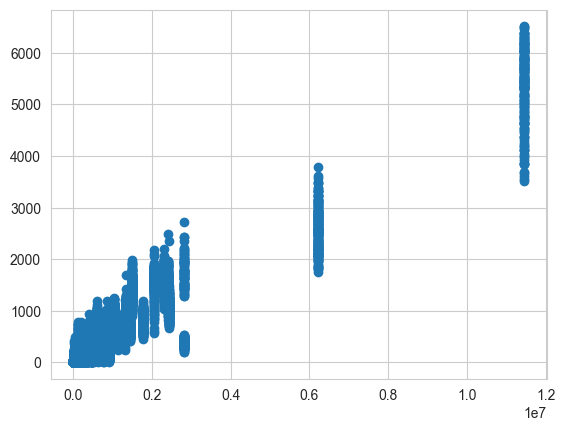

In [264]:
plt.scatter(df['numero_habitantes'], df['partos_e_nascimentos_qtd'])

In [265]:
df['partos_populacao'] = (df['numero_habitantes'] / 100000) * df['partos_e_nascimentos_qtd']

In [266]:
df[['mes','ano','partos_e_nascimentos_qtd','numero_habitantes','partos_populacao']]

,mes,ano,partos_e_nascimentos_qtd,numero_habitantes,partos_populacao
0,1,2009,7.0,21495,1.50465
1,1,2009,77.0,96833,74.56141
2,1,2009,10.0,5363,0.53630
3,1,2009,67.0,86895,58.21965
4,1,2009,13.0,15890,2.06570
...,...,...,...,...,...
1013735,2,2024,NaN,14956,NaN
1013736,2,2024,NaN,8768,NaN
1013737,2,2024,NaN,4215,NaN
1013738,2,2024,NaN,5815,NaN


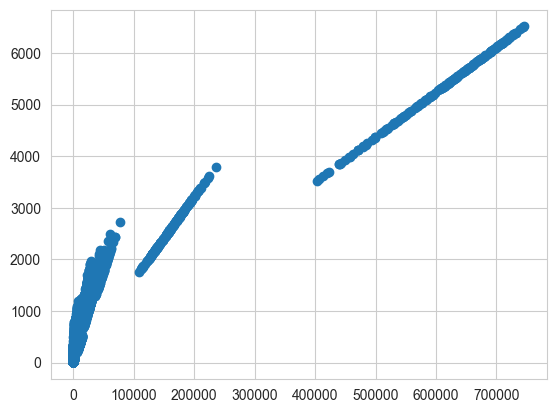

In [267]:
plt.scatter(df['partos_populacao'], df['partos_e_nascimentos_qtd'])

In [268]:
import multiprocessing

multiprocessing.cpu_count()

12

In [273]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['partos_populacao','partos_e_nascimentos_qtd']].dropna())

In [274]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [272]:
df.dropna(inplace=True)
df.isnull().sum()

ano                                0
mes                                0
municipio                          0
regiao_codigo                      0
regiao_nome                        0
uf_codigo                          0
uf                                 0
uf_nome                            0
capital                            0
numero_habitantes                  0
populacao_faixa                    0
diagnostico_ultrasonografia_qtd    0
partos_e_nascimentos_qtd           0
cirurgias_obstetricas_qtd          0
diagnostico_ultrasonografia_val    0
partos_e_nascimentos_val           0
cirurgias_obstetricas_val          0
longitude                          0
latitude                           0
partos_populacao                   0
dtype: int64

In [275]:
df['cluster'] = y_predicted

In [276]:
df['cluster'].value_counts()

cluster
0    162647
2       182
1       182
Name: count, dtype: int64

In [277]:
agrupado = df.groupby(['regiao_nome', 'cluster']).agg({'cluster': 'count'}).rename(columns={'cluster': 'tot'}).reset_index()

In [278]:
agrupado

,regiao_nome,cluster,tot
0,Centro-Oeste,0,13976
1,Nordeste,0,30133
2,Norte,0,17240
3,Sudeste,0,67366
4,Sudeste,1,182
5,Sudeste,2,182
6,Sul,0,33932


In [279]:
df.groupby(['regiao_nome']).agg({'partos_e_nascimentos_qtd': 'sum'})

,partos_e_nascimentos_qtd
regiao_nome,
Centro-Oeste,826261.0
Nordeste,3880026.0
Norte,1614308.0
Sudeste,5375375.0
Sul,1781026.0


In [280]:
df_cluster_0 = df[df.cluster==0]
df_cluster_1 = df[df.cluster==1]
df_cluster_2 = df[df.cluster==2]
#df_cluster_3 = df[df.cluster==3]

In [281]:
df_cluster_0

,ano,mes,municipio,regiao_codigo,regiao_nome,uf_codigo,uf,uf_nome,capital,numero_habitantes,...,diagnostico_ultrasonografia_qtd,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,diagnostico_ultrasonografia_val,partos_e_nascimentos_val,cirurgias_obstetricas_val,longitude,latitude,partos_populacao,cluster
0,2009,1,Alta Floresta D'Oeste,1,Norte,11,RO,Rondônia,Não,21495,...,2.0,7.0,2.0,48.40,3103.80,1091.46,-61.999824,-11.935540,1.50465,0
1,2009,1,Ariquemes,1,Norte,11,RO,Rondônia,Não,96833,...,7.0,77.0,63.0,196.90,34141.80,27791.01,-63.033269,-9.908463,74.56141,0
11,2009,1,Ji-Paraná,1,Norte,11,RO,Rondônia,Não,124333,...,65.0,84.0,78.0,1861.75,37245.60,36709.18,-61.945095,-10.882051,104.43972,0
13,2009,1,Nova Brasilândia D'Oeste,1,Norte,11,RO,Rondônia,Não,15679,...,2.0,16.0,4.0,48.40,7094.40,2182.92,-62.308230,-11.721325,2.50864,0
14,2009,1,Ouro Preto do Oeste,1,Norte,11,RO,Rondônia,Não,35044,...,8.0,8.0,10.0,248.60,3469.90,4577.34,-62.261055,-10.723574,2.80352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013690,2024,2,Rio Verde,5,Centro-Oeste,52,GO,Goiás,Não,225696,...,245.0,73.0,135.0,17749.92,42856.20,67736.98,-50.929681,-17.794543,164.75808,0
1013696,2024,2,Santa Helena de Goiás,5,Centro-Oeste,52,GO,Goiás,Não,38492,...,11.0,9.0,11.0,364.86,5039.40,5636.92,-50.598443,-17.812355,3.46428,0
1013715,2024,2,São Simão,5,Centro-Oeste,52,GO,Goiás,Não,17020,...,37.0,1.0,8.0,1103.30,929.21,4328.62,-50.549700,-18.989739,0.17020,0
1013730,2024,2,Uruaçu,5,Centro-Oeste,52,GO,Goiás,Não,42546,...,362.0,51.0,81.0,15451.71,28709.74,39694.05,-49.147486,-14.520220,21.69846,0


Text(0, 0.5, 'y')

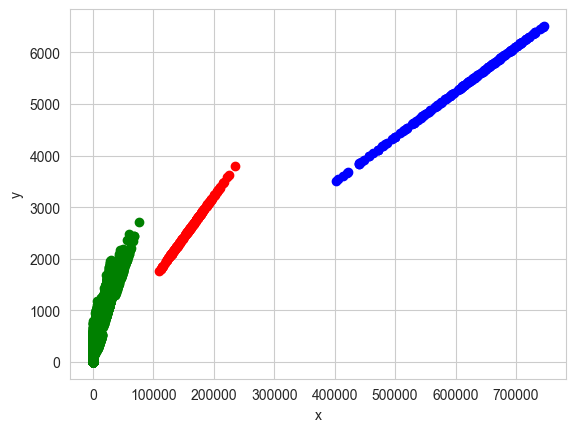

In [282]:
plt.scatter(df_cluster_0.partos_populacao, df_cluster_0['partos_e_nascimentos_qtd'], color='green')
plt.scatter(df_cluster_1.partos_populacao, df_cluster_1['partos_e_nascimentos_qtd'], color='blue')
plt.scatter(df_cluster_2.partos_populacao, df_cluster_2['partos_e_nascimentos_qtd'], color='red')
#plt.scatter(df_cluster_3.numero_habitantes, df_cluster_3['partos_e_nascimentos_qtd'], color='yellow')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='purple', maker="*", label='centroid')
plt.xlabel('x')
plt.ylabel('y')

In [283]:
k = range(1,10)
result = []
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(df[['numero_habitantes', 'partos_e_nascimentos_qtd']])
    result.append(km.inertia_)
result

[4.031054230465626e+16,
 1.2819265135113184e+16,
 7258261478560279.0,
 4212999486620984.0,
 3133244353712498.5,
 881257939432982.0,
 560796372168447.5,
 359179668273354.0,
 307310191063053.06]

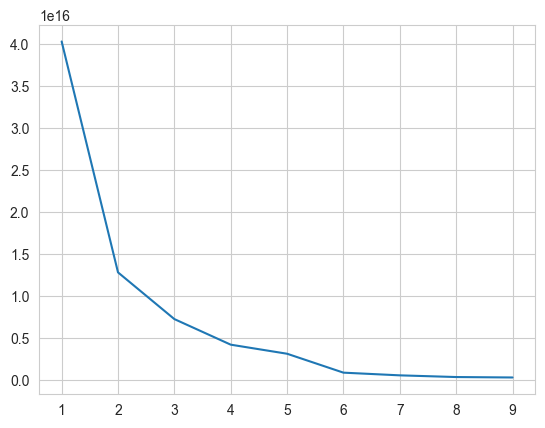

In [284]:
plt.plot(k, result)

In [147]:
scaler = MinMaxScaler()
scaler.fit(df[['partos_populacao']])
df['partos_populacao_t'] = scaler.transform(df[['partos_populacao']])
df['partos_populacao_t']

0          1.990216e-06
1          9.993018e-05
11         1.399851e-04
13         3.336166e-06
14         3.731483e-06
               ...     
1013690    2.208479e-04
1013696    4.617298e-06
1013715    2.012510e-07
1013730    2.906206e-05
1013739    4.894425e-02
Name: partos_populacao_t, Length: 163011, dtype: float64

In [150]:
scaler.fit(df[['partos_e_nascimentos_qtd']])
df['partos_e_nascimentos_qtd_t'] = scaler.transform(df[['partos_e_nascimentos_qtd']])
df.partos_e_nascimentos_qtd_t

0          0.000921
1          0.011669
11         0.012744
13         0.002303
14         0.001075
             ...   
1013690    0.011055
1013696    0.001228
1013715    0.000000
1013730    0.007677
1013739    0.198833
Name: partos_e_nascimentos_qtd_t, Length: 163011, dtype: float64

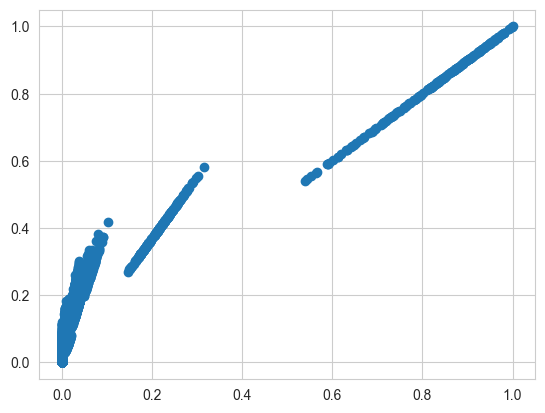

In [151]:
plt.scatter(df.partos_populacao_t, df.partos_e_nascimentos_qtd_t)

In [232]:
def convert_to_datetime(data):
    return datetime.strptime(data, format("%Y-%m"))

In [233]:
df['data'] = list(map(lambda x,y: "{}-{}".format(x,y), df['ano'], df['mes']))

In [234]:
df['time'] = list(map(lambda x: convert_to_datetime(x), df['data']))

In [207]:
df_km = df[['time','numero_habitantes','partos_e_nascimentos_qtd']]

In [246]:
df_km = df.groupby(['time']).agg({'partos_e_nascimentos_qtd': 'sum',
                                  'partos_e_nascimentos_val':'sum',
                                  'cirurgias_obstetricas_qtd': 'sum',
                                  'cirurgias_obstetricas_val': 'sum'})

In [247]:
df_km

,partos_e_nascimentos_qtd,partos_e_nascimentos_val,cirurgias_obstetricas_qtd,cirurgias_obstetricas_val
time,,,,
2009-01-01,105424.0,56176411.81,70826.0,34960984.60
2009-02-01,102933.0,54825506.19,69128.0,34439919.89
2009-03-01,117114.0,62399264.22,77726.0,38846455.60
2009-04-01,113382.0,60340947.92,75718.0,37832404.45
2009-05-01,114401.0,61212225.34,76650.0,38719927.20
...,...,...,...,...
2023-10-01,67911.0,39509933.76,88512.0,48678007.20
2023-11-01,66166.0,38674158.57,86385.0,47615551.26
2023-12-01,64281.0,37576476.97,84110.0,46159764.70


In [211]:
#df_km.reset_index(inplace=True)

In [214]:
#df_km['time'] = df_km['time'].astype('str')

In [255]:
df_stkm = df_km[['partos_e_nascimentos_qtd', 'cirurgias_obstetricas_qtd', 'cirurgias_obstetricas_val']]

In [256]:
df_stkm

,partos_e_nascimentos_qtd,cirurgias_obstetricas_qtd,cirurgias_obstetricas_val
time,,,
2009-01-01,105424.0,70826.0,34960984.60
2009-02-01,102933.0,69128.0,34439919.89
2009-03-01,117114.0,77726.0,38846455.60
2009-04-01,113382.0,75718.0,37832404.45
2009-05-01,114401.0,76650.0,38719927.20
...,...,...,...
2023-10-01,67911.0,88512.0,48678007.20
2023-11-01,66166.0,86385.0,47615551.26
2023-12-01,64281.0,84110.0,46159764.70


In [217]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# Exemplo de dados de séries temporais (usando dados sintéticos)
#data = np.random.rand(100, 50)  # 100 séries temporais, cada uma com 50 pontos

# Normalização dos dados
scaler = TimeSeriesScalerMeanVariance()
data_normalized = scaler.fit_transform(df_km)

# Aplicação do K-means clustering
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels = kmeans.fit_predict(data_normalized)

# Visualização dos clusters
for yi in range(3):
    plt.subplot(3, 1, yi + 1)
    for xx in data_normalized[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    plt.plot(kmeans.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '2009-01-01'

In [176]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
data = np.random.rand(100, 10)  # 10 séries temporais, cada uma com 100 pontos
len(dates)

100

In [177]:
len(data)

100

In [220]:
df_dt = pd.DataFrame(data, index=dates, columns=[f'Series_{i}' for i in range(10)])

In [222]:
df_dt.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01',
               '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
      

In [257]:
data_transposed = df_stkm.T.values

In [258]:
# Normalização dos dados
scaler = TimeSeriesScalerMeanVariance()
data_normalized = scaler.fit_transform(data_transposed)

In [259]:
kmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels = kmeans.fit_predict(data_normalized)

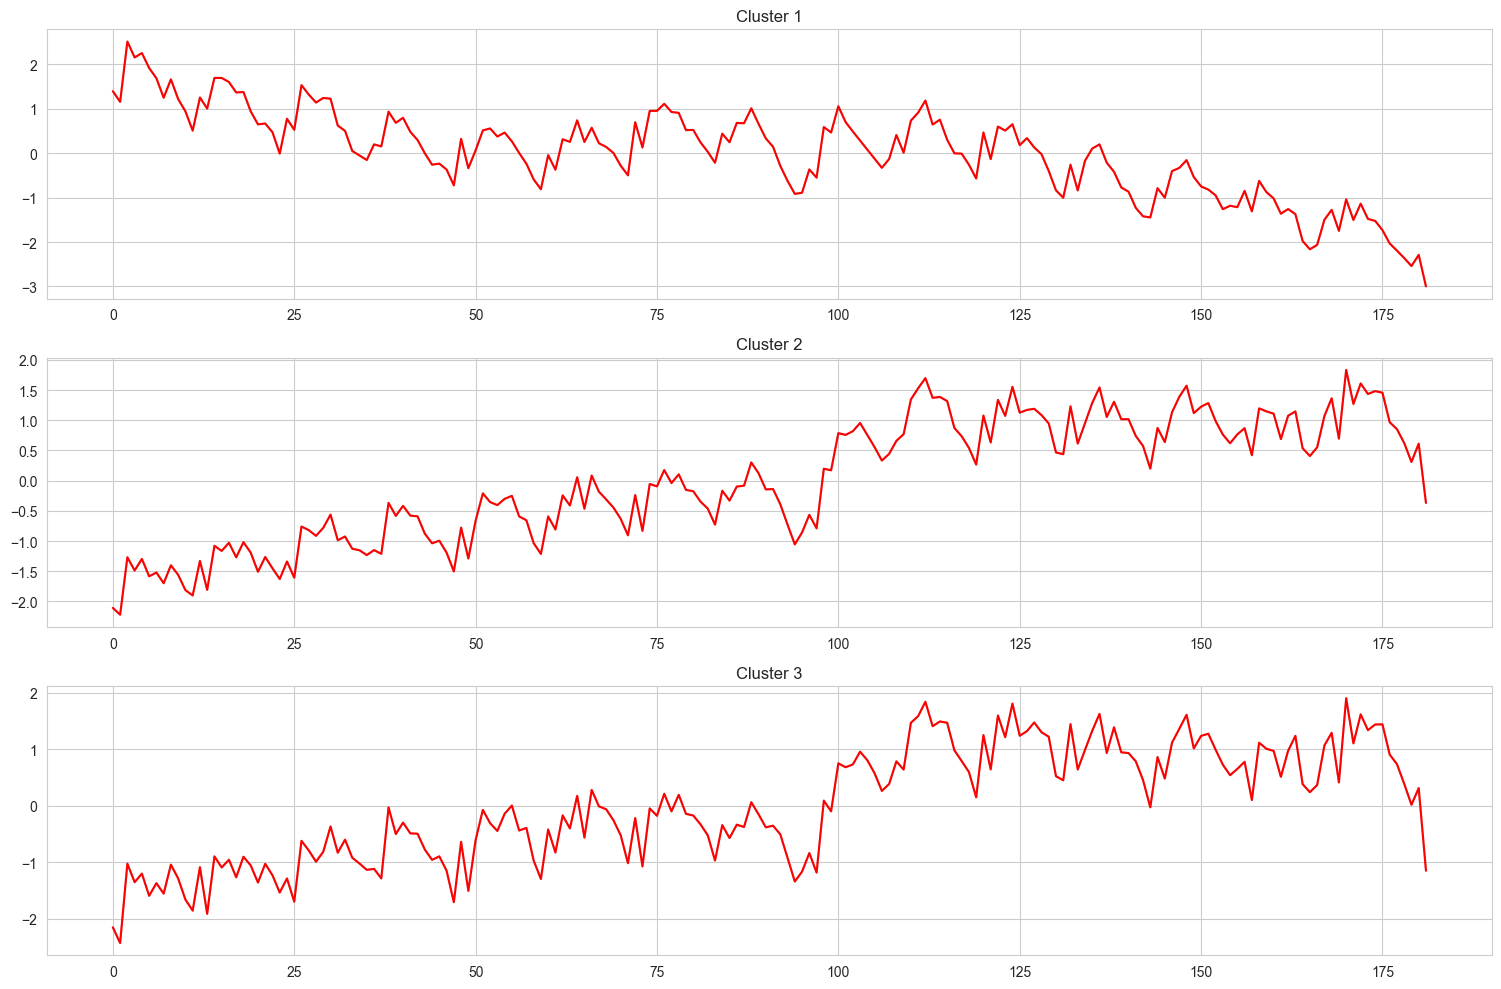

In [260]:
plt.figure(figsize=(15, 10))
for yi in range(3):
    plt.subplot(3, 1, yi + 1)
    for xx in data_normalized[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    plt.plot(kmeans.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi + 1}")

plt.tight_layout()
plt.show()